# Darren Hunt

**PHYS 434 AA**

**10-09-2020**

**Lab #1**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (18,9)

# Part 1: Statistics

In [2]:
# 1.1.B -- cumulative distribution function for known sigmas
for i in range(5):
    print("Sigma = " + str(i) + "; Probability = " + str(("{0:.5f}".format(stats.norm.cdf(i)))))

Sigma = 0; Probability = 0.50000
Sigma = 1; Probability = 0.84134
Sigma = 2; Probability = 0.97725
Sigma = 3; Probability = 0.99865
Sigma = 4; Probability = 0.99997


**#1.1.B** Scipy's statistical package includes the cumulative distribution function (CDF), here used for a normal (Gaussian or "bell curve") distribution. The function takes a sigma value as an input parameter; here I have written a quick loop to simply print the sigma value and corresponding output over a range of 0 to 4 in order to compare to the standard z-table, https://en.wikipedia.org/wiki/Standard_normal_table. These output values match up with the z-table appropriately.

The output of stats.norm.cdf gives us a number between 0 and 1, interpreted as a probability. This is the probability that an observation is located within *X* number of standard deviations from the distribution's mean. For example, in words, the probability that I observe a value within 3 standard deviations of the mean is 0.9987 = 99.87%. Visually, three standard deviations of the mean encapsulates most of the area under the bell curve except a little under the tail ends, so this serves as a "sanity check" for this interpretation.

In [3]:
# 1.1.C and 1.1.D -- takes a known probability value and converts to an equivalent sigma
prob = [0.5, 0.84134, 0.97725, 0.99865, 0.99997, 0.15866, 0.00135, 0.00003]
for i in range(len(prob)-1):
    print("Probability in = " + str(prob[i]) + ", Sigma out = " + str("{0:.1f}".format(stats.norm.ppf(prob[i]))))

Probability in = 0.5, Sigma out = 0.0
Probability in = 0.84134, Sigma out = 1.0
Probability in = 0.97725, Sigma out = 2.0
Probability in = 0.99865, Sigma out = 3.0
Probability in = 0.99997, Sigma out = 4.0
Probability in = 0.15866, Sigma out = -1.0
Probability in = 0.00135, Sigma out = -3.0


**#1.1.C** Here I have used the Percent Point Function (PPF) for a normal distribution in order to perform the opposite operation, taking a known probability value (found from the z-table) and finding the associated sigma value. For comparing to the z-table, I rounded the sigma output to one decimal place and used the same precision as the wiki z-table for the inputs. According to the z-table, we get the right values of sigma for these probabilities; this makes sense since we are just doing the opposite function as the CDF in 1.1.B.

**#1.1.D** Both positive and negative values of sigma are possible, but probability is always positive. A negative sigma (like those for the last three printed lines above) is associated with a probability from different integration bounds. When we perform these functions, we are integrating the area under the curve from different bounds: -inf to X, instead of X to +inf. The sum of the integration from either sides (i.e., for the negative and positive values of the same sigma) will encapsulate the total area and therefore equals 1. Therefore a negative sigma value describes the probability summing from a different side.

For example, the probability having an observation within the area integrated from the left tail end to -1 sigma = 0.16, so the probability that an observation falls in the rest of the area under the curve (-1 sigma to the right tail) is 0.84.

In [4]:
print(stats.norm.cdf(1) + stats.norm.cdf(-1))  # do the probabilities add up to exactly 1?
int(stats.norm.ppf(0.84134)) is abs(int(stats.norm.ppf(0.15866)))  # are the absolute values of the sigmas the same?

1.0


True

**#2.A** The Rayleigh Distribution

The Rayleigh distribution is another type of continuous probability density function like the Gaussian, but is only for positive values. Both the width and peak are affected by altering input values.

https://en.wikipedia.org/wiki/Rayleigh_distribution, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rayleigh.html

**#2.B**

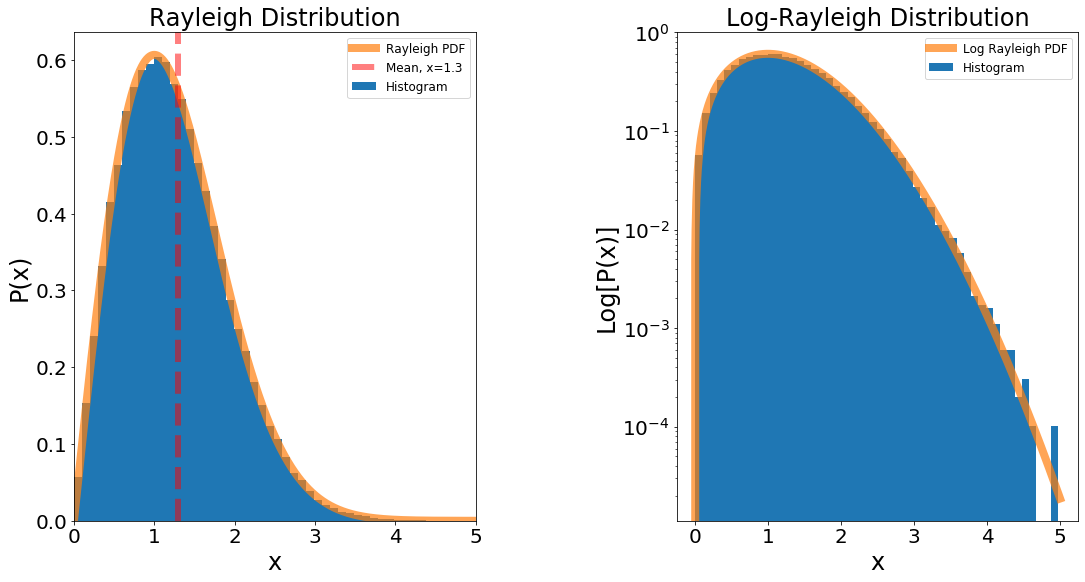

In [5]:
# 2.B -- plotting the Rayleigh distribution
points = stats.rayleigh.rvs(loc = 0, scale = 1, size = 100000)

fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'wspace': 0.5})
ax1.set_title("Rayleigh Distribution", fontsize=24), ax2.set_title("Log-Rayleigh Distribution", fontsize=24)
ax1.set_xlabel("x", fontsize=24), ax2.set_xlabel("x", fontsize=24)
ax1.set_ylabel("P(x)", fontsize=24), ax2.set_ylabel("Log[P(x)]", fontsize=24)
ax1.tick_params(labelsize=20), ax2.tick_params(labelsize=20)
ax1.set_xlim([0,5.0]), ax2.set_yscale('log')

ax1.hist(points, 50, density = True, label = "Histogram")  # plot a histogram using the 100,000 points we generated above
ax2.hist(points, 50, density = True, label = "Histogram") 

x = np.linspace(0,5.0,1000)
ax1.plot(x,stats.rayleigh.pdf(x, loc = 0, scale = 1), linewidth = 8, alpha = 0.7, label = "Rayleigh PDF")  # plot the Rayleigh PDF
ax1.axvline(x=1.3, ymin=0, linewidth = 6, linestyle='--', alpha = 0.5, color='r', label = "Mean, x=1.3")
ax2.plot(x,stats.rayleigh.pdf(x, loc = 0, scale = 1), linewidth = 8, alpha = 0.7, label = "Log Rayleigh PDF")  # plot the log Rayleigh PDF

ax1.legend(fontsize=12), ax2.legend(fontsize=12)
plt.show()

The first graph displays a plot of the Rayleigh probability density distribution, plotted using 1000 equally spaced points between 0 and 5. Also plotted is the histogram of 100,000 random points generated in the shape of the Rayleigh curve. This is the standard expected curve following the function $f(x)=xe^{(-x^2/2)}$ (source: Scipy documentation) for a nonzero x. Though the points for the histogram are random, they fit the curve of the Rayleigh due to their selection following the distribution and its probabilities. The vertical line provides the graph mean (calculated in #3.D).

The second graph is the log of the Rayleigh distribution; the y axis of both the histogram and curve are logarithmic, while the x axis remains the same 1000 points between 0 and 5. Plotting the Log-Rayleigh graph allows us to look further into the data to determine if our histogram truly matches the distribution. This is useful for when we have large experimental data sets and want to determine if a certain curve fits that data accurately. As seen above, the histogram (expectedly) matches the Log-Rayleigh curve.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rayleigh.html

**#3.A** Say we hypothetically measure the value of 1.8.

**#3.B** Statistical question: For a signal-free Rayleigh distribution (i.e. random), what is the probability that I measure a value of 1.8 or higher?

**#3.C** We should integrate the area under the curve from x = 1.8 through the right tail end of the Rayleigh distribution. $\int\limits_{1.8}^\infty PDF(x)dx$

This looks like 1 - (the CDF for x = 1.8).

**#3.D**

In [6]:
value = 1.8
mean = stats.rayleigh.mean(loc=0, scale=1)
print("Mean = " + str("{0:.4f}".format(mean)))  #  useful for comparison to the x value
print("Measurement: " + str(value))

probability = stats.rayleigh.cdf(1.8)  # the area under the curve from 1.8 to the right tail end
print("Probability for x = 1.8 or lower: " + str("{0:.5f}".format(probability)))
print("Probability for x = 1.8 or higher: " + str("{0:.5f}".format(1 - probability)))

Mean = 1.2533
Measurement: 1.8
Probability for x = 1.8 or lower: 0.80210
Probability for x = 1.8 or higher: 0.19790


Therefore, the probability that we measure a value of 1.8 or higher in this random Rayleigh-distributed data is 0.198, or 19.8%. We find the probability above 1.8 by subtracting 1 - the calculated probability from the CDF. This is because the given value first gives us the probability to the left (below) and not right of the x-value, but we want the probability above.

The probability can now be converted into a relevant sigma value using the inverse of the CDF, which we know as the PPF.

**#3.E**

In [7]:
sig = stats.rayleigh.ppf(probability) - 1  # subtract 1 for the correct signs of the sigma
print("Sigma = " + str("{0:.2f}".format(sig)))

Sigma = 0.80


This means the value of x = 1.8 falls at sigma = 0.80 from the mean.

**#4** Exploring different x measurement values

In [8]:
vals = [0.2, 0.7, 1.0, 1.3, 2.2, 3.0]  # test values to see how the probabilities and sigmas vary

for v in range(len(vals)):
    p = stats.rayleigh.cdf(vals[v])
    sg = stats.rayleigh.ppf(p) - 1
    print("x = " + str(vals[v]) + "; Probability below x = " + str("{0:.4f}".format(p)) + "; Probability above x = " + str("{0:.4f}".format(1-p)) 
          + "; Sigma = " + str("{0:.2f}".format(sg)))

x = 0.2; Probability below x = 0.0198; Probability above x = 0.9802; Sigma = -0.80
x = 0.7; Probability below x = 0.2173; Probability above x = 0.7827; Sigma = -0.30
x = 1.0; Probability below x = 0.3935; Probability above x = 0.6065; Sigma = 0.00
x = 1.3; Probability below x = 0.5704; Probability above x = 0.4296; Sigma = 0.30
x = 2.2; Probability below x = 0.9111; Probability above x = 0.0889; Sigma = 1.20
x = 3.0; Probability below x = 0.9889; Probability above x = 0.0111; Sigma = 2.00


Here I chose various values that fall under my Rayleigh plot from the far left to far right end. At the far left, x = 0.2 is very close to 0, so almost the entire area under the curve is encompassed above x = 0.2. Therefore, this has a very high probability for a measurement at or above 0.2. The sigma is negative, since this point is to the left of the distribution's mean. As we travel closer to the mean, the probabilities decrease, since there is less area integrated. x = 3.0 and above is the least probable measurement.

The sigma is equal to the mode or most frequently occurring value (source: https://en.wikipedia.org/wiki/Rayleigh_distribution), so it makes sense that at x = 1 (where the peak occurs) that sigma = 0.

I have printed both the probabilities below and above a given x measurement, which add up to 1, in order to emphasize the meaning of the signs for the sigma values. As shown, a negative sigma value will initially correspond to integration from -inf to x. To answer our statistical question in #3.B, it is simplest to compare all values' probabilities to be measured "at or above x".

# Part 2: Non-Continuous Distributions

**#1.A** The Poisson distribution is a type of Binomial distribution for low probabilities. The Poisson distribution is discrete like a step function, meaning it is non-continuous and has exact integer values of measurements and corresponding probabilities. The Scipy Poisson PMF (probability mass function) takes in a parameter *k*, the number of occurrences, and $\mu$, a shape parameter.

The PMF of the Poisson is $f(k)=e^{-\mu}\frac{\mu^k}{k!}$ {source: Scipy)

https://en.wikipedia.org/wiki/Poisson_distribution, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

**#1.B**

In [9]:
def poisson_plotter(k, mu):
    # a function to repeat the poisson plots for different parameters quickly.
    
    fig, ax = plt.subplots(1, 1)
    ax.set_title("Poisson Distribution for k = " + str(k) + ", mu = " + str(mu), fontsize=24)
    ax.set_xlabel("x", fontsize=24)
    ax.set_ylabel("P(x)", fontsize=24)
    ax.tick_params(labelsize=20)
 
    pts = list(range(k+1))
    
    for p in range(len(pts)):
        ax.step(pts, stats.poisson.pmf(pts, mu), linewidth = 6, color = 'b', label = "Poisson PMF" if p == 0 else "")  # plot the Poisson PMF
    
    mean = np.average(pts)
    
    ax.legend(fontsize=12)
    plt.show()

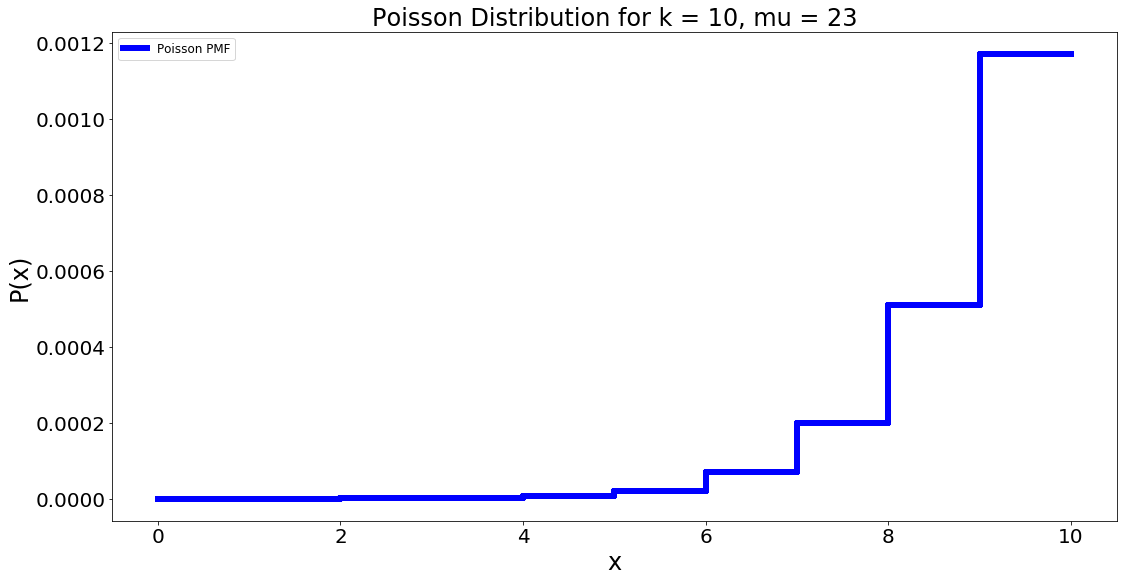

In [10]:
poisson_plotter(10, 23)

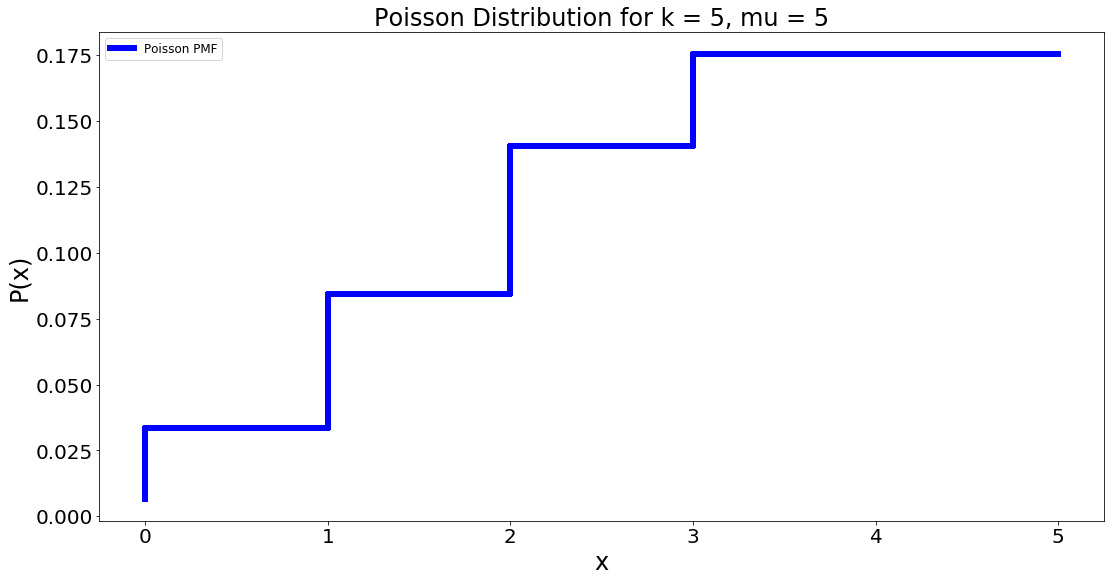

In [11]:
poisson_plotter(5, 5)

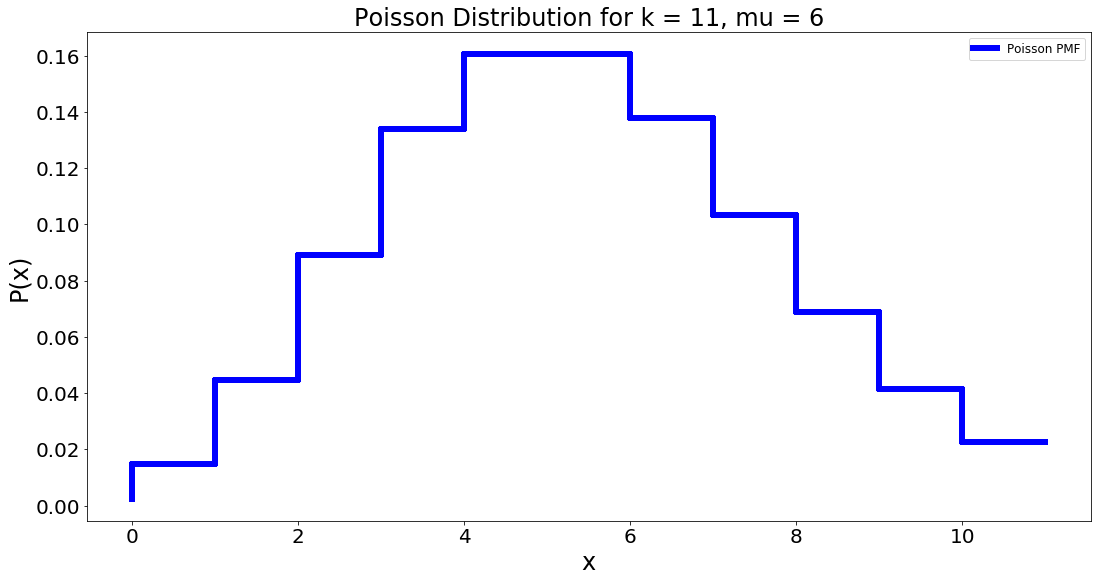

In [12]:
poisson_plotter(11, 6)

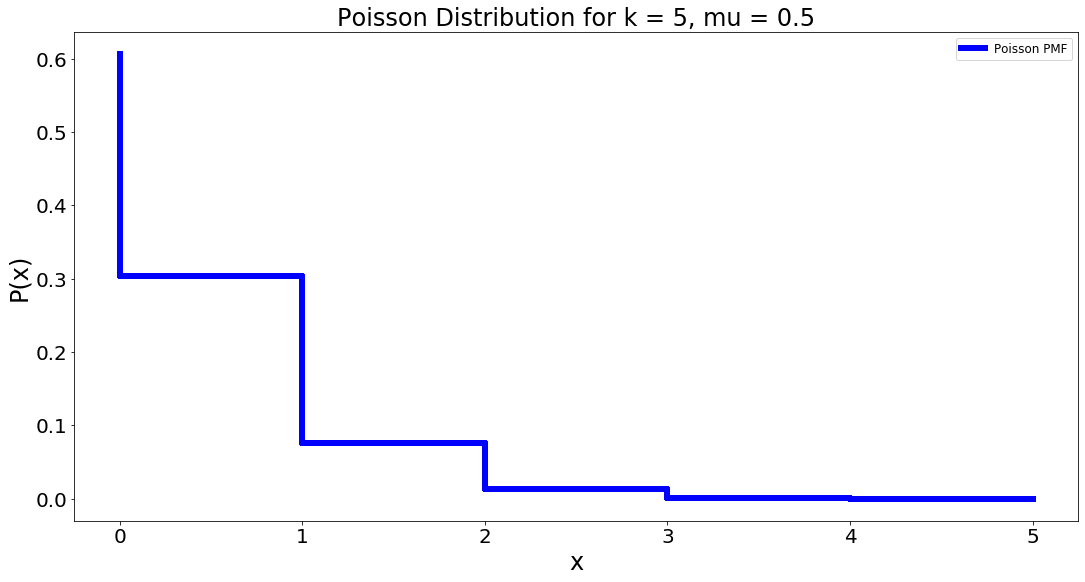

In [13]:
poisson_plotter(5, 0.5)

Above are four different Poisson distributions with different input k and mu values to demonstrate how these parameters affect the graph. All Poisson graphs are discrete, hence the stair shape, like a step function. The k values are occurrences, or events, and mu determines the shape of the output. For a very small mu (see graph 4) the most probable outcome becomes zero events, and the remaining discrete k values decrease in probability of occurrence. For a very large mu (see graph 1) the most events, k, becomes most probable, and 0 events is improbable. For a mu somewhere inbetween 0 and k, we find a distribution more 'symmetrical' where there are events on either side.

For some k values above, the average of the events does not end up as a discrete value.

**#1.C** For a discrete Poisson distribution of data where mu=0.5, what is the probability we have measure k=5 events?

(This is similar to graph #4.)

In [14]:
prb = stats.poisson.cdf(5, 0.5)
print("Probability of measuring any other integer k value events = " + str(prb))
print("probability of measuring k=5 events = " + str(1-prb))

Probability of measuring any other integer k value events = 0.9999858350626777
probability of measuring k=5 events = 1.4164937322314053e-05


The k=5 step in graph #4 confirms these calculations. The value of 5 is statistically unlikely as it is nearly 0. This means any other integer value of k is more likely. This calculation was the sum of the probabilities from k=0 to k=4.

**#1.D** The discrete Poisson distribution means that we can only have integer values of *k* events. This essentially operates like a step function, as graphed above. For continuous distributions, we can measure any value inbetween two integers, such as a value of x=2.683, and find whatever probabilities and sigmas correspond to these floating point observations. For discrete distributions, a discrete probability and therefore sigma (since these are mathematically related) must also exist--otherwise, a single k value could somehow have multiple potential probabilities and sigmas and would not be a valid function any longer.

For experimental data, this means when making an measurement on an observable, we are guaranteed to always get the same discrete probability if the data continues to follow the same Poisson distribution--similar to quantum mechanical observations, where energy is quantized and has discrete eigenvalue possibilities.

**#1.E** For one Poisson distribution, the input values of k and corresponding sigma and probability values are discrete and non-changing. The mu input values can be non-integer as they are a shape parameter, but they do not continuously change in a single distribution. The mean can be non-integer, because the mean is not the most probable value, but just the weighted average of the distribution. An average here therefore does not have to imply the most probable measurement. The mean will change based on the PMF given the input variables.